In [22]:
import numpy as np
import cv2
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib import pyplot as plt
import PDI.histograma.histo as histo
import PDI.utils.utils as utils
import PDI.filtros.espacial as espacial

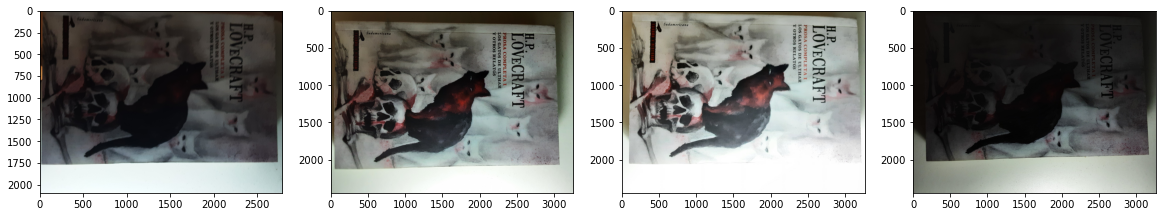

In [23]:
# Cargar imágenes

HP1 = cv2.imread("./Imagenes/HP1.jpg")
HP1 = cv2.cvtColor(HP1, cv2.COLOR_BGR2RGB)
HP2 = cv2.imread("./Imagenes/HP2.jpg")
HP2 = cv2.cvtColor(HP2, cv2.COLOR_BGR2RGB)
HP3 = cv2.imread("./Imagenes/HP3.jpg")
HP3 = cv2.cvtColor(HP3, cv2.COLOR_BGR2RGB)
HP4 = cv2.imread("./Imagenes/HP4.jpg")
HP4 = cv2.cvtColor(HP4, cv2.COLOR_BGR2RGB)
HP = [HP1,HP2,HP3,HP4]
SI1 = cv2.imread("./Imagenes/SI1.jpg")
SI2 = cv2.imread("./Imagenes/SI2.jpg")
SI3 = cv2.imread("./Imagenes/SI3.jpg")
SI4 = cv2.imread("./Imagenes/SI4.jpg")
SI5 = cv2.imread("./Imagenes/SI5.jpg")
SI = [SI1,SI2,SI3,SI4,SI5]

utils.plot(HP, figsize=(20,10), patron=(1,4))


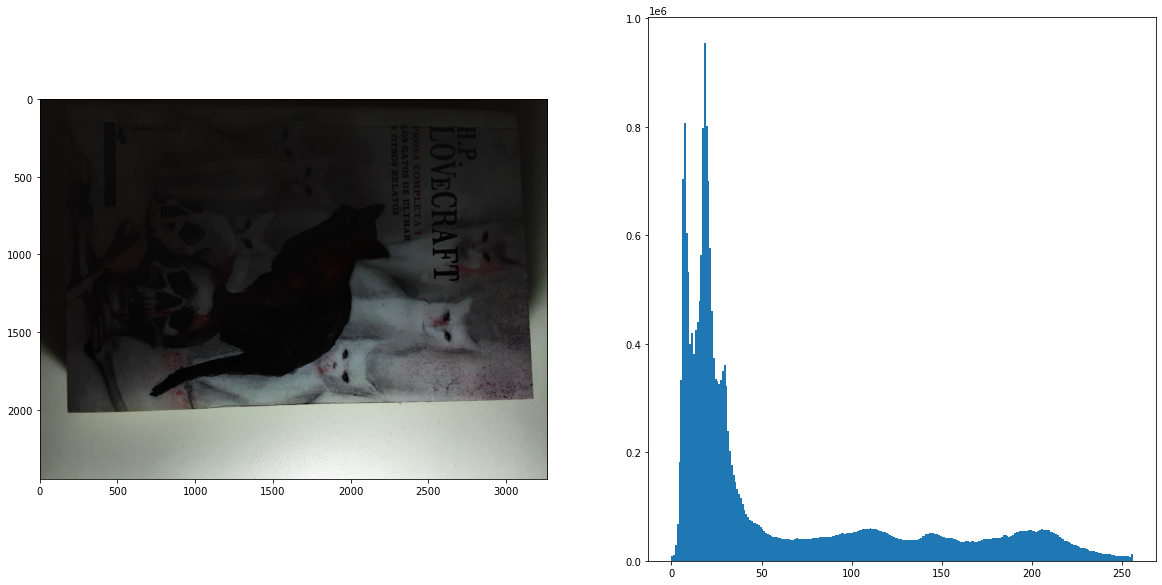

In [24]:
histo.plot_histo([HP[3]],figsize=(20,10), patron=(1,2))

In [25]:
def histo_img_eq(img, space="hsv"):
    #RGB
    if space=="rgb":
        channels_rgb = cv2.split(img)
        r_eq = cv2.equalizeHist(channels_rgb[0]) 
        g_eq = cv2.equalizeHist(channels_rgb[1]) 
        b_eq = cv2.equalizeHist(channels_rgb[2])
        ret = cv2.merge((r_eq, g_eq, b_eq)) 
    
    #HSV
    if space=="hsv":
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        channels_hsv = cv2.split(img_hsv)
        v_eq = cv2.equalizeHist(channels_hsv[2])
        hsv_eq = cv2.merge((channels_hsv[0], channels_hsv[1], v_eq)) 
        ret = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)
    
    

    #histo.plot_histo([ret],figsize=(30,20), patron=(1,2))
    return ret

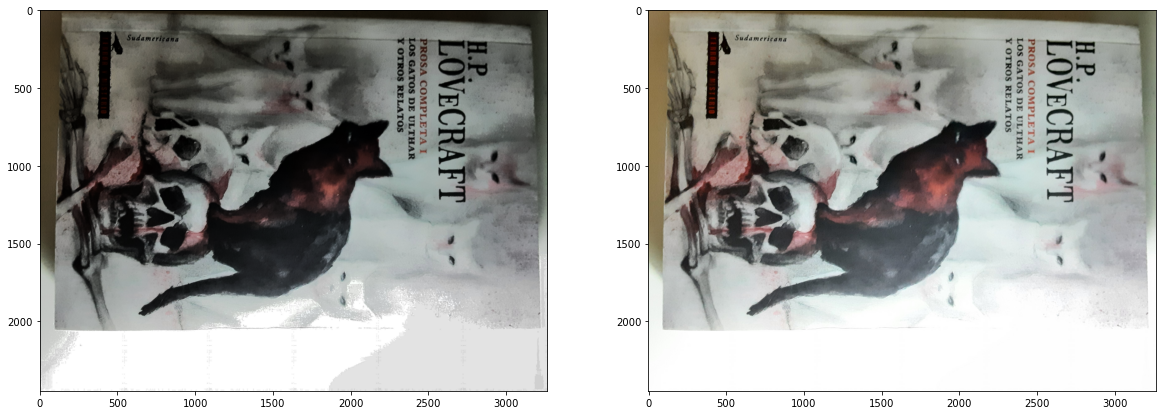

In [59]:
img = HP[2]
img_rgb_eqHSV = histo_img_eq(img, space="hsv")
img_rgb_eqRGB = histo_img_eq(img, space="rgb")
utils.plot([img_rgb_eqHSV,img], figsize=(20,10), patron=(1,2))
#Con RGB se ve mucho mas nitido.
#Con HSV se mantienen mejor los colores, pero la imagen resultante es mas difusa.

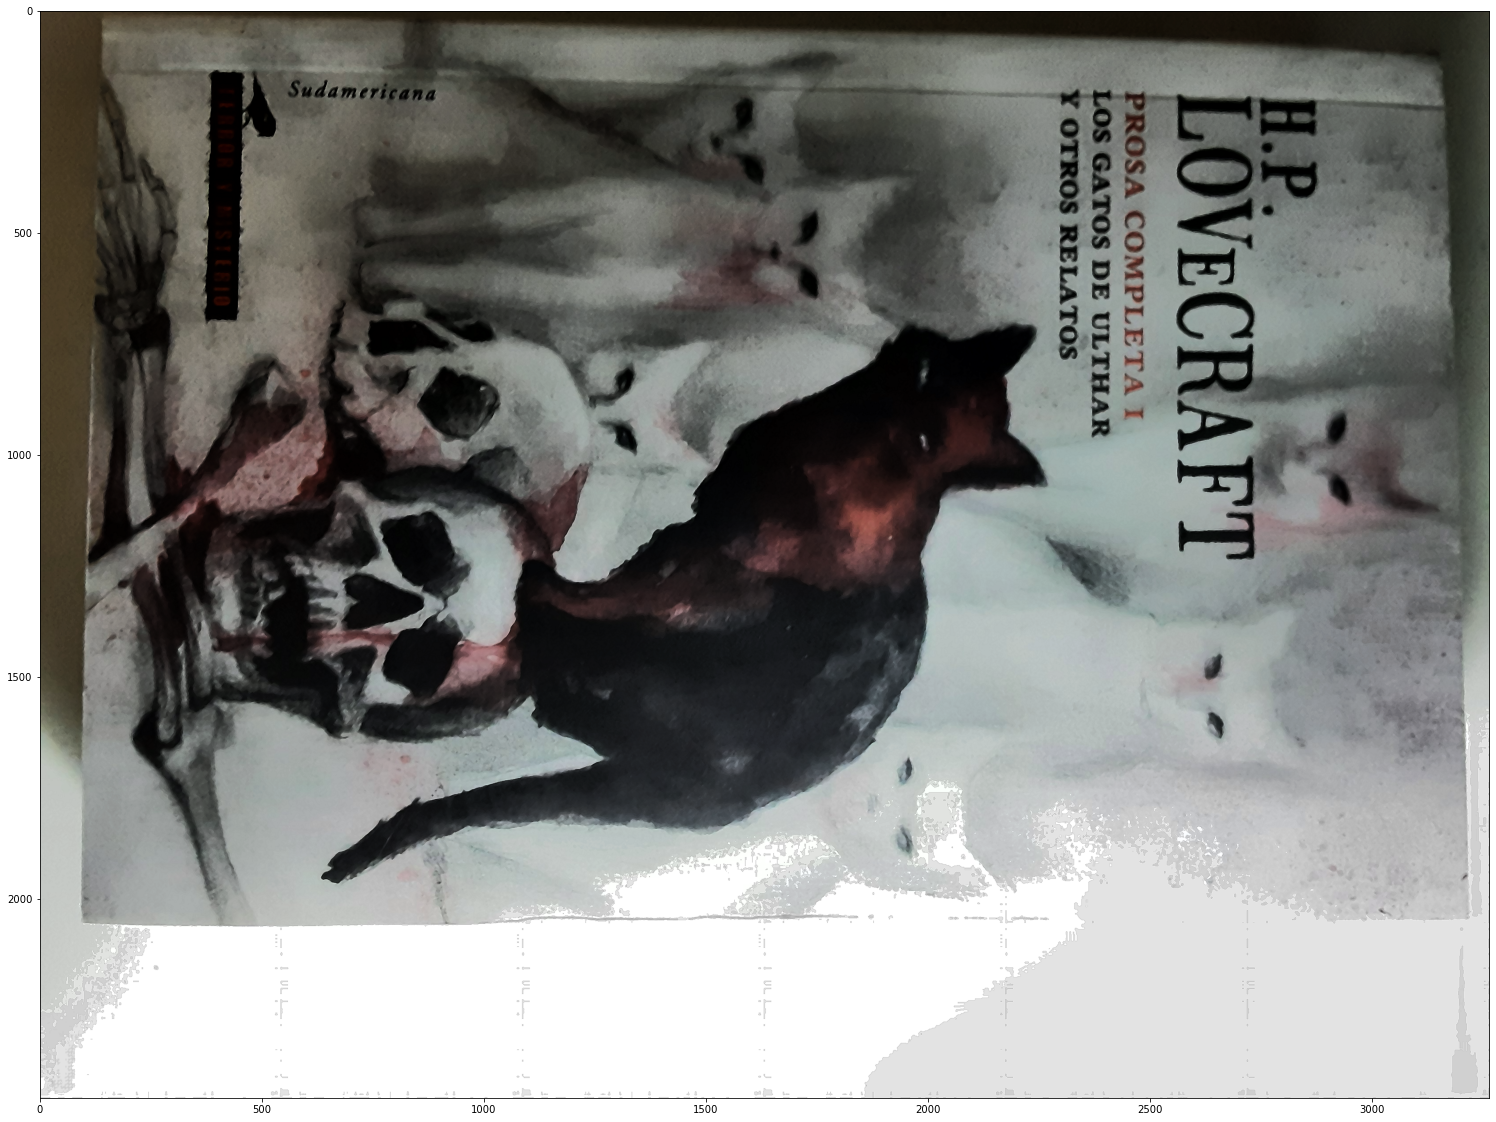

In [62]:
#Hacemos blur mediana
img_rgb_median_blur = cv2.medianBlur(img_rgb_eqHSV,5) #mediana
#Filtro pasa alto
h,s,v = cv2.split(cv2.cvtColor(img_rgb_median_blur,cv2.COLOR_RGB2HSV))
kernel = espacial.get_kernel_suma_1(3)
v_filtrado = cv2.filter2D(v, -1, kernel)
img_hsv_v_filtrada = cv2.merge((h,s,v_filtrado))
img_rgb_v_filtrada = cv2.cvtColor(img_hsv_v_filtrada,cv2.COLOR_HSV2RGB)
utils.plot([img_rgb_v_filtrada], figsize=(30,20), patron=(1,1))

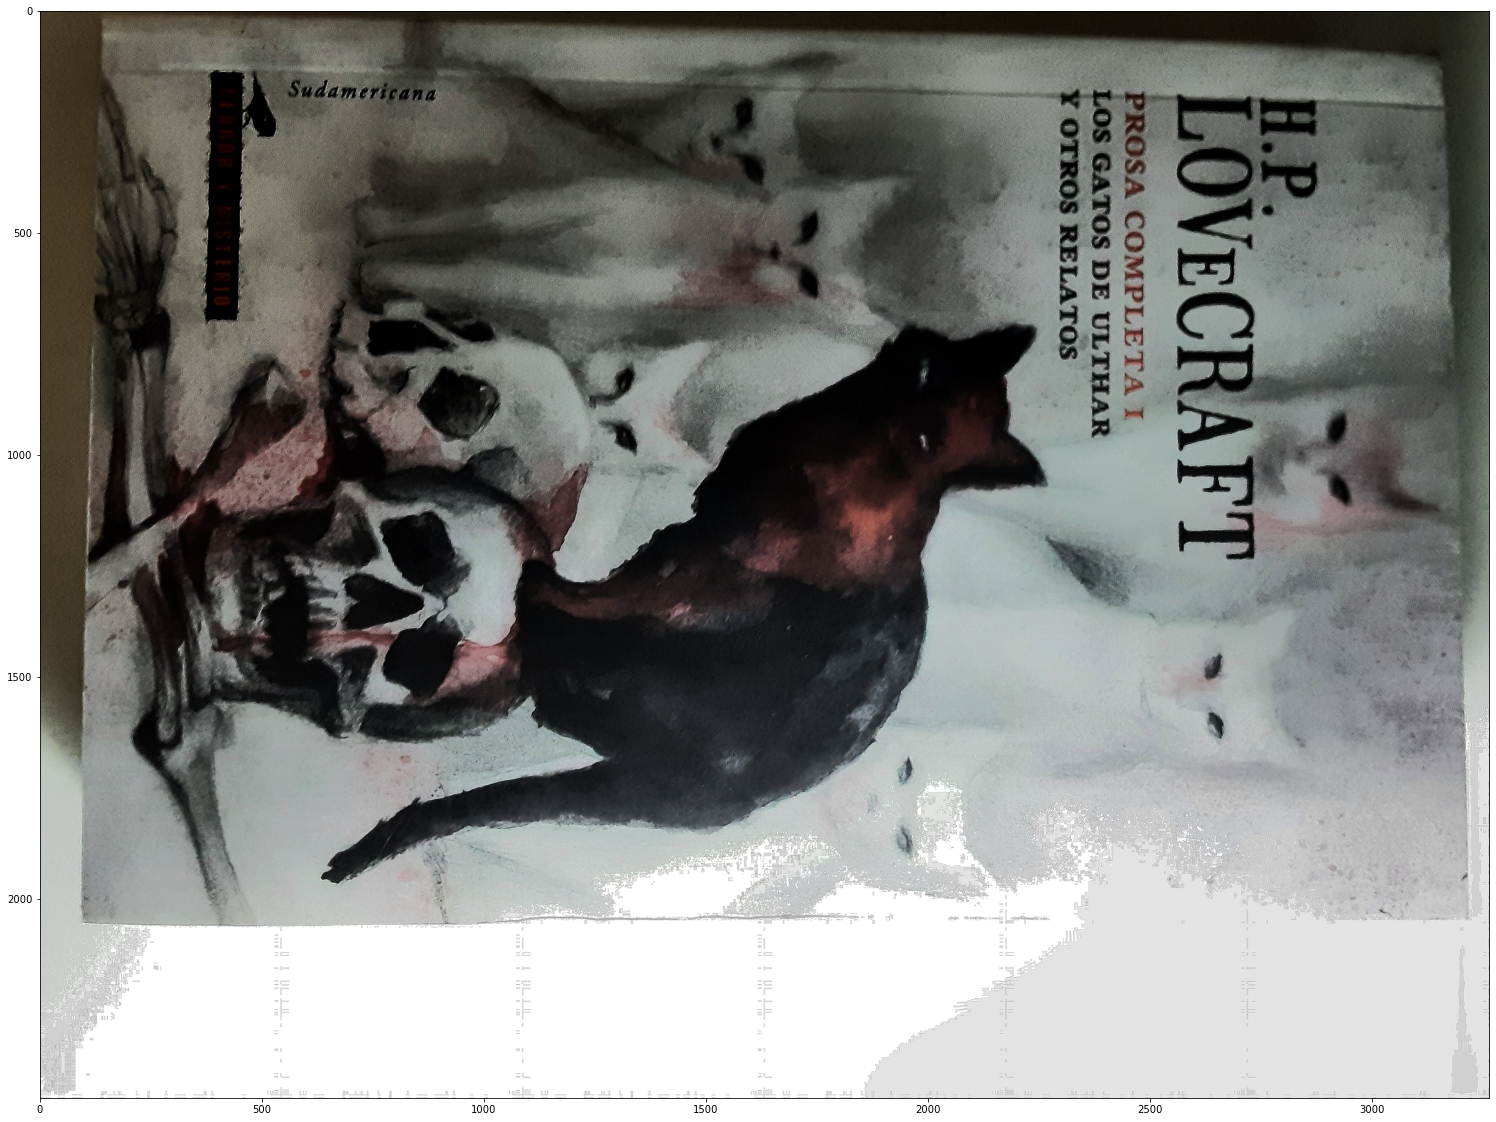

In [63]:
#Filtro pasa alto
h,s,v = cv2.split(cv2.cvtColor(img_rgb_eqHSV,cv2.COLOR_RGB2HSV))
kernel = espacial.get_kernel_suma_1(3)
v_filtrado = cv2.filter2D(v, -1, kernel)
img_hsv_v_filtrada = cv2.merge((h,s,v_filtrado))
img_rgb_v_filtrada = cv2.cvtColor(img_hsv_v_filtrada,cv2.COLOR_HSV2RGB)
utils.plot([img_rgb_v_filtrada], figsize=(30,20), patron=(1,1))